<a href="https://colab.research.google.com/github/saronbantte/Hospital_Treatment_Pricing_Predication/blob/main/Hospital_Treatment_Pricing_Predictionitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler as sc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Package Pricing at Mission Hospital - Data Supplement.csv')

In [6]:
df.head()

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0


# New Section

In [7]:
df.isna().sum()

,0
SL.,0
AGE,0
GENDER,0
MALE,0
MARITAL STATUS,0
UNMARRIED,0
KEY COMPLAINTS -CODE,36
ACHD,0
CAD-DVD,0
CAD-SVD,0


In [8]:
df.describe()

,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT,COST OF IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879839,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,...,0.016129,0.995968,0.870968,198723.330282,12.062084,11.612903,3.475806,8.153226,0.197581,8544.201613
std,71.735626,25.899358,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,...,0.126227,0.063500,0.335914,122587.492984,0.505390,5.392617,3.853520,3.755793,0.398979,21521.877503
min,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,46093.000000,10.738416,3.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,131652.750000,11.787923,8.000000,1.000000,6.000000,0.000000,0.000000
50%,124.500000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,162660.500000,11.999419,10.000000,2.000000,7.000000,0.000000,0.000000
75%,186.250000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,220614.000000,12.304170,13.000000,4.000000,10.000000,0.000000,0.000000
max,248.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,887350.000000,13.695995,41.000000,30.000000,22.000000,1.000000,196848.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SL.                           248 non-null    int64  
 1   AGE                           248 non-null    float64
 2   GENDER                        248 non-null    object 
 3   MALE                          248 non-null    int64  
 4   MARITAL STATUS                248 non-null    object 
 5   UNMARRIED                     248 non-null    int64  
 6   KEY COMPLAINTS -CODE          212 non-null    object 
 7   ACHD                          248 non-null    int64  
 8   CAD-DVD                       248 non-null    int64  
 9   CAD-SVD                       248 non-null    int64  
 10  CAD-TVD                       248 non-null    int64  
 11  CAD-VSD                       248 non-null    int64  
 12  OS-ASD                        248 non-null    int64  
 13  other

In [17]:
corr=df.select_dtypes(include=['int64','float64']).corr()
corr.head()

,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT,COST OF IMPLANT
SL.,1.000000,-0.324235,0.057228,0.286832,0.108952,-0.221423,-0.076198,-0.111828,0.026219,0.221508,...,0.001788,0.079546,0.248490,-0.498937,-0.472028,-0.407325,-0.448393,-0.120290,-0.034727,-0.099933
AGE,-0.324235,1.000000,-0.192658,-0.898548,-0.129065,0.422342,0.119027,0.380296,-0.063709,-0.121199,...,0.030317,-0.101227,-0.466681,0.420695,0.438932,0.215106,0.345178,-0.051822,0.207383,0.182170
MALE,0.057228,-0.192658,1.000000,0.167849,0.119805,-0.163109,-0.063372,-0.201066,-0.044720,0.073361,...,0.046092,0.044720,0.117116,-0.152880,-0.177989,-0.111896,-0.144904,-0.012725,0.060238,0.024966
UNMARRIED,0.286832,-0.898548,0.167849,1.000000,0.100112,-0.345740,-0.102660,-0.372678,0.055886,0.154620,...,-0.016660,0.072444,0.389710,-0.375130,-0.400068,-0.167443,-0.280433,0.053263,-0.279025,-0.227179
ACHD,0.108952,-0.129065,0.119805,0.100112,1.000000,-0.100680,-0.025972,-0.094285,-0.018328,-0.073085,...,0.083466,0.018328,0.065646,-0.165320,-0.227400,-0.122947,-0.130248,-0.044132,-0.066784,-0.071007


In [18]:
positive_predictor=corr['TOTAL COST TO HOSPITAL '].sort_values(ascending=False)
positive_predictor

,TOTAL COST TO HOSPITAL
TOTAL COST TO HOSPITAL,1.000000
Ln(Total Cost),0.924243
LENGTH OF STAY - ICU,0.821995
TOTAL LENGTH OF STAY,0.698709
COST OF IMPLANT,0.483825
IMPLANT,0.423276
AGE,0.420695
CREATININE,0.377611
AMBULANCE,0.353739
BODY WEIGHT,0.348358


In [19]:
df.columns

Index(['SL.', 'AGE', 'GENDER', 'MALE', 'MARITAL STATUS', 'UNMARRIED',
       'KEY COMPLAINTS -CODE', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'Diabetes1', 'Diabetes2', 'hypertension1',
       'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'AMBULANCE', 'TRANSFERRED',
       'STATE AT THE TIME OF ARRIVAL', 'ALERT', 'TYPE OF ADMSN', 'ELECTIVE',
       'TOTAL COST TO HOSPITAL ', 'Ln(Total Cost)', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'IMPLANT ', 'COST OF IMPLANT'],
      dtype='object')

<Axes: xlabel='TYPE OF ADMSN', ylabel='TOTAL COST TO HOSPITAL '>

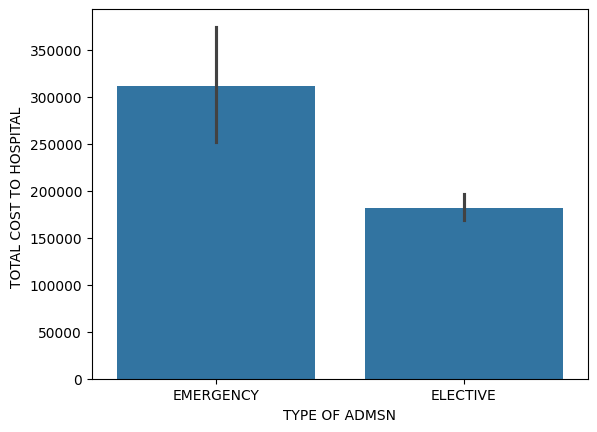

In [ ]:
sns.barplot(x='TYPE OF ADMSN', y='TOTAL COST TO HOSPITAL ', data= df)


<Axes: xlabel='TOTAL LENGTH OF STAY', ylabel='TOTAL COST TO HOSPITAL '>

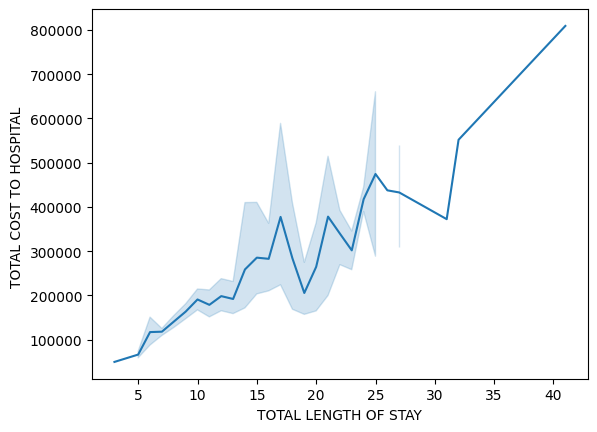

In [ ]:
sns.lineplot(x='TOTAL LENGTH OF STAY', y='TOTAL COST TO HOSPITAL ', data=df)

<Axes: xlabel='COST OF IMPLANT', ylabel='TOTAL COST TO HOSPITAL '>

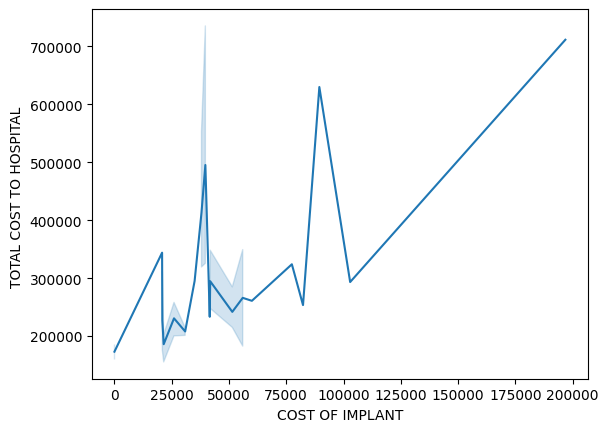

In [ ]:
 sns.lineplot(y='TOTAL COST TO HOSPITAL ', x='COST OF IMPLANT', data=df)

<Axes: xlabel='LENGTH OF STAY - ICU', ylabel='TOTAL COST TO HOSPITAL '>

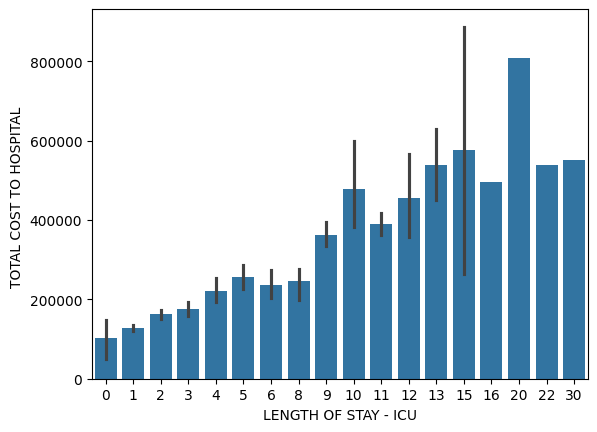

In [ ]:
sns.barplot(y='TOTAL COST TO HOSPITAL ', x='LENGTH OF STAY - ICU', data=df)

In [20]:
ICU_implant=df.groupby(['TOTAL LENGTH OF STAY', 'IMPLANT '])['TOTAL COST TO HOSPITAL '].mean().reset_index()
ICU_implant.head()

,TOTAL LENGTH OF STAY,IMPLANT,TOTAL COST TO HOSPITAL
0,3,0,49700.000000
1,5,0,66312.500000
2,6,0,102633.110000
3,6,1,276458.000000
4,7,0,118032.557097


<Axes: xlabel='TOTAL LENGTH OF STAY', ylabel='TOTAL COST TO HOSPITAL '>

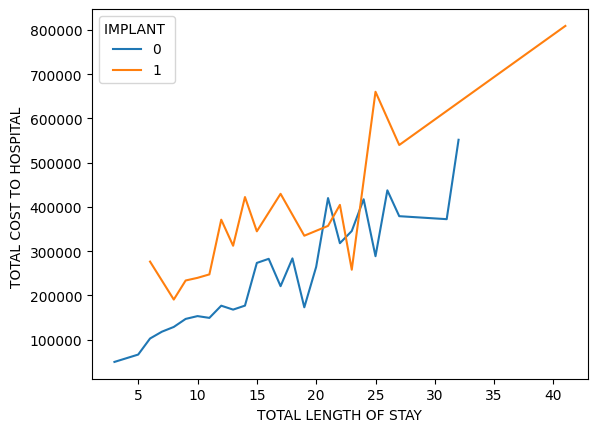

In [21]:
sns.lineplot(x='TOTAL LENGTH OF STAY',y='TOTAL COST TO HOSPITAL ', hue='IMPLANT ',data=ICU_implant )
# as the length of ICU stay increase the cost of the to hospiatl decreases.

<Axes: xlabel='IMPLANT ', ylabel='TOTAL LENGTH OF STAY'>

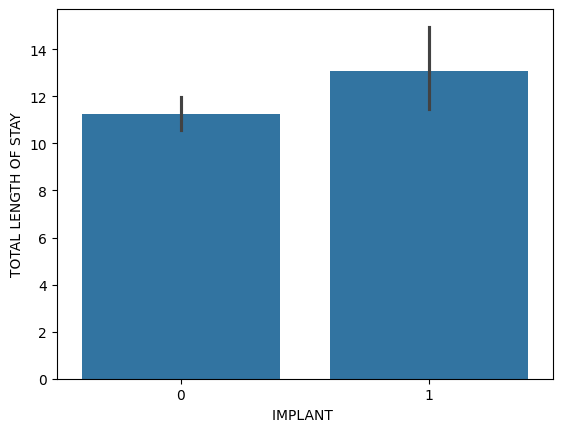

In [ ]:
sns.barplot(y='TOTAL LENGTH OF STAY', x='IMPLANT ', data=Hdata)

In [22]:
A_W_Height=df.groupby([(df['AGE']).astype('int'), 'BODY HEIGHT','BODY WEIGHT'])['TOTAL COST TO HOSPITAL '].mean().reset_index()
A_W_Height.head()

,AGE,BODY HEIGHT,BODY WEIGHT,TOTAL COST TO HOSPITAL
0,0,45,2,77241.0
1,0,47,2,48156.0
2,0,57,6,308817.0
3,0,66,5,233376.0
4,0,68,6,551809.0


<Axes: xlabel='BODY WEIGHT', ylabel='TOTAL COST TO HOSPITAL '>

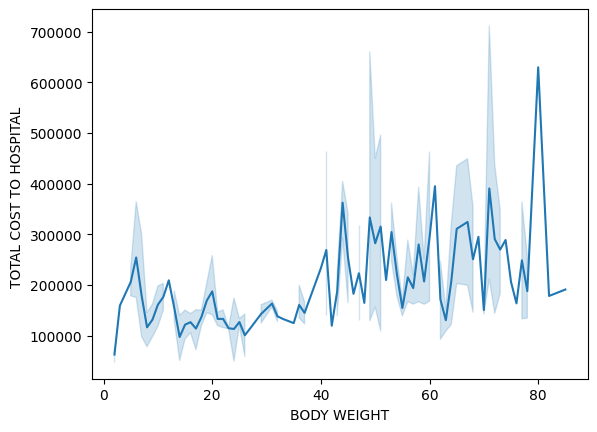

In [ ]:
sns.lineplot(x='BODY WEIGHT', y='TOTAL COST TO HOSPITAL ', data=A_W_Height)

<Axes: xlabel='AGE', ylabel='TOTAL COST TO HOSPITAL '>

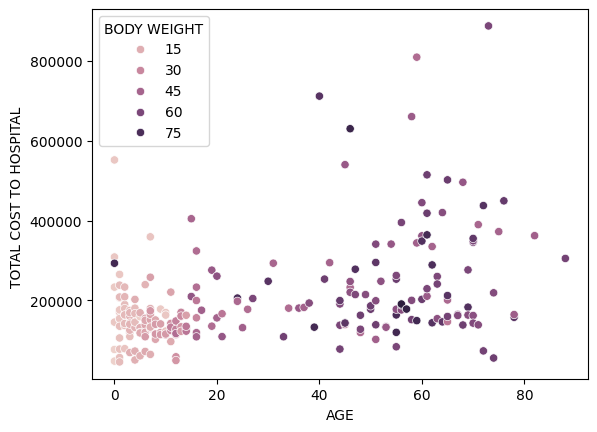

In [ ]:
sns.scatterplot(x='AGE',y='TOTAL COST TO HOSPITAL ', hue='BODY WEIGHT', data=A_W_Height )

<Axes: xlabel='AGE', ylabel='TOTAL COST TO HOSPITAL '>

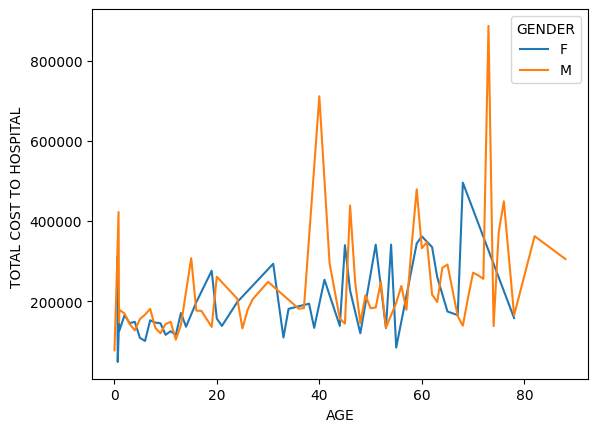

In [ ]:
gender_cost=Hdata.groupby(['GENDER', 'AGE'])['TOTAL COST TO HOSPITAL '].mean().reset_index()
gender_cost.head()
sns.lineplot (x='AGE', y='TOTAL COST TO HOSPITAL ',hue='GENDER', data=gender_cost)

<Axes: xlabel='MARITAL STATUS', ylabel='TOTAL COST TO HOSPITAL '>

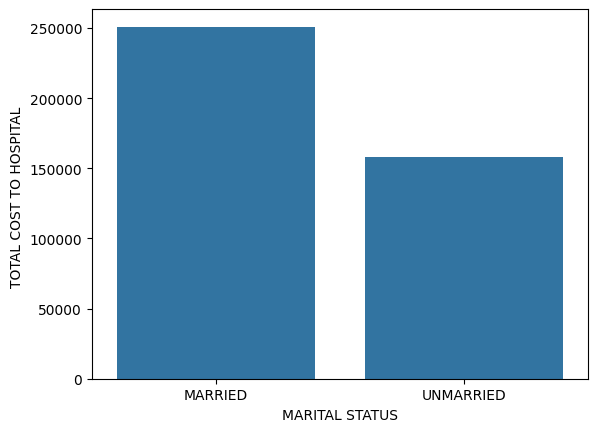

In [23]:
Marital_cost=df.groupby('MARITAL STATUS')['TOTAL COST TO HOSPITAL '].mean().reset_index()
Marital_cost.head()
sns.barplot(x='MARITAL STATUS', y='TOTAL COST TO HOSPITAL ', data=Marital_cost)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Diabetes1'),
  Text(1, 0, 'Diabetes2'),
  Text(2, 0, 'Hypertension1'),
  Text(3, 0, 'hypertension1'),
  Text(4, 0, 'hypertension2'),
  Text(5, 0, 'hypertension3'),
  Text(6, 0, 'other')])

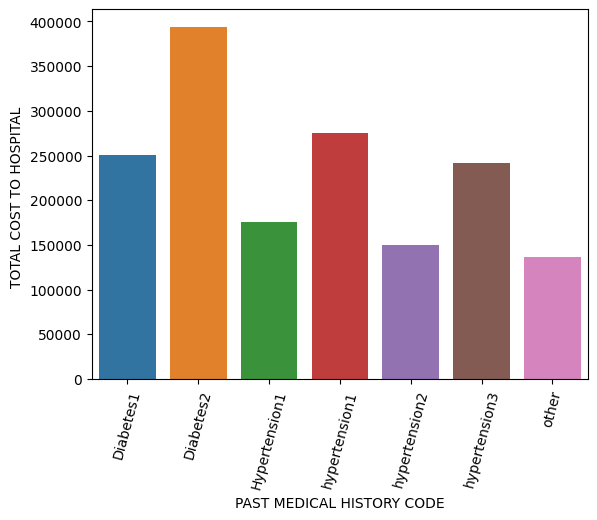

In [24]:
total_cost_with_past=df.groupby('PAST MEDICAL HISTORY CODE')['TOTAL COST TO HOSPITAL '].mean().reset_index()
total_cost_with_past
sns.barplot(x='PAST MEDICAL HISTORY CODE', y='TOTAL COST TO HOSPITAL ',hue='PAST MEDICAL HISTORY CODE', data=total_cost_with_past)
plt.xticks(rotation=75)

In [26]:
feature, target= df[['GENDER','AGE','MARITAL STATUS','PAST MEDICAL HISTORY CODE',
                       'BODY WEIGHT','BODY HEIGHT','TOTAL LENGTH OF STAY','LENGTH OF STAY - ICU','TYPE OF ADMSN', 'COST OF IMPLANT','IMPLANT ']] , df['TOTAL COST TO HOSPITAL ']

In [ ]:
feature.dtypes

GENDER                        object
AGE                          float64
MARITAL STATUS                object
PAST MEDICAL HISTORY CODE     object
BODY WEIGHT                    int64
BODY HEIGHT                    int64
TOTAL LENGTH OF STAY           int64
LENGTH OF STAY - ICU           int64
TYPE OF ADMSN                 object
COST OF IMPLANT                int64
IMPLANT                        int64
dtype: object

In [ ]:
feature.isna().sum()
feature.dtypes

,0
GENDER,object
AGE,float64
MARITAL STATUS,object
PAST MEDICAL HISTORY CODE,object
BODY WEIGHT,int64
BODY HEIGHT,int64
TOTAL LENGTH OF STAY,int64
LENGTH OF STAY - ICU,int64
TYPE OF ADMSN,object
COST OF IMPLANT,int64


In [28]:
from sklearn.preprocessing import OneHotEncoder
OH=OneHotEncoder(sparse_output=False, drop='first')
for col in feature.select_dtypes(include='object').columns:
  encode_cols=OH.fit_transform(feature[[col]])
  encode_cols=pd.DataFrame(encode_cols, columns=OH.get_feature_names_out([col]))
  feature=feature.drop(col, axis=1)
  feature=pd.concat([feature, encode_cols], axis=1)
feature.head()


,AGE,BODY WEIGHT,BODY HEIGHT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,COST OF IMPLANT,IMPLANT,GENDER_M,MARITAL STATUS_UNMARRIED,PAST MEDICAL HISTORY CODE_Diabetes2,PAST MEDICAL HISTORY CODE_Hypertension1,PAST MEDICAL HISTORY CODE_hypertension1,PAST MEDICAL HISTORY CODE_hypertension2,PAST MEDICAL HISTORY CODE_hypertension3,PAST MEDICAL HISTORY CODE_other,PAST MEDICAL HISTORY CODE_nan,TYPE OF ADMSN_EMERGENCY
0,58.0,49,160,25,12,38000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,59.0,41,155,41,20,39690,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,82.0,47,164,18,9,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,80,173,14,13,89450,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60.0,58,175,24,12,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# deal with missing values
feature.isna().sum()

,0
AGE,0
BODY WEIGHT,0
BODY HEIGHT,0
TOTAL LENGTH OF STAY,0
LENGTH OF STAY - ICU,0
COST OF IMPLANT,0
IMPLANT,0
GENDER_M,0
MARITAL STATUS_UNMARRIED,0
PAST MEDICAL HISTORY CODE_Diabetes2,0


In [ ]:
feature.dtypes

,0
AGE,float64
BODY WEIGHT,int64
BODY HEIGHT,int64
TOTAL LENGTH OF STAY,int64
LENGTH OF STAY - ICU,int64
COST OF IMPLANT,int64
IMPLANT,int64
GENDER_F,float64
GENDER_M,float64
MARITAL STATUS_MARRIED,float64


when looking at the learning curves the value of the mSE is not good also there is a big gap between the curves when the traning size ranges from 80 to 140.


In [ ]:
feature.head()

,AGE,BODY WEIGHT,BODY HEIGHT,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,COST OF IMPLANT,IMPLANT,GENDER_M,MARITAL STATUS_UNMARRIED,PAST MEDICAL HISTORY CODE_Diabetes2,PAST MEDICAL HISTORY CODE_Hypertension1,PAST MEDICAL HISTORY CODE_hypertension1,PAST MEDICAL HISTORY CODE_hypertension2,PAST MEDICAL HISTORY CODE_hypertension3,PAST MEDICAL HISTORY CODE_other,PAST MEDICAL HISTORY CODE_nan,TYPE OF ADMSN_EMERGENCY
0,58.0,49,160,25,12,38000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,59.0,41,155,41,20,39690,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,82.0,47,164,18,9,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,80,173,14,13,89450,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60.0,58,175,24,12,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

x_train, x_test, y_train,y_test=train_test_split(feature, target, test_size=0.2, random_state=42)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
y_train= sc.fit_transform(y_train.values.reshape(-1,1))
y_train=y_train.ravel()
y_test=sc.transform(y_test.values.reshape(-1,1))

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_leaf_nodes': [None, 50, 100]
}

rfc = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=100, cv=5,  scoring='neg_mean_squared_error',random_state=42)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
MSE: 0.42117476531251674
MAE: 0.33060851590222406
MAPE: 0.7261527268816047


In [41]:
from sklearn.linear_model import  RidgeCV, ElasticNetCV

rig_regcv=RidgeCV(alphas=[0.1, 0.5, 0.7],cv=5)
rig_regcv.fit(x_train, y_train)
yhat_1=rig_regcv.predict(x_test)

Elastic_cv=ElasticNetCV(alphas=[0.1, 0.5, 0.7],cv=5)
Elastic_cv.fit(x_train, y_train)
yhat_2=Elastic_cv.predict(x_test)

predictions=[ yhat_1,yhat_2,y_pred]
models=[ rig_regcv, Elastic_cv,best_model]

mse_list=[]
mae_list=[]
mape_list=[]

for yhat in predictions:
  mse_list.append(mean_squared_error(y_test, yhat))
  mae_list.append(mean_absolute_error(y_test, yhat))
  mape_list.append(mean_absolute_percentage_error(y_test, yhat))

for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"  MSE: {mse_list[i]}")
    print(f"  MAE: {mae_list[i]}")
    print(f"  MAPE: {mape_list[i]}")
    print("\n")



Model: RidgeCV(alphas=[0.1, 0.5, 0.7], cv=5)
  MSE: 0.4453674456097083
  MAE: 0.3493421490387081
  MAPE: 1.1182023258241751


Model: ElasticNetCV(alphas=[0.1, 0.5, 0.7], cv=5)
  MSE: 0.49710685544358696
  MAE: 0.3411799499381759
  MAPE: 0.9604922842479527


Model: RandomForestRegressor(max_depth=20, max_features=None, max_leaf_nodes=50,
                      min_samples_split=5, random_state=42)
  MSE: 0.42117476531251674
  MAE: 0.33060851590222406
  MAPE: 0.7261527268816047




I tried to find out the most important features the can give is a better perdiction and lower MSE value using permutation_importance

Let's create a learning  curves and residual graphs to visualize the performance of the models.

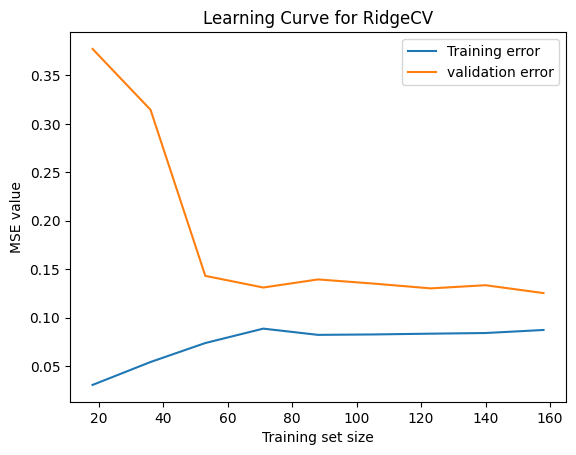

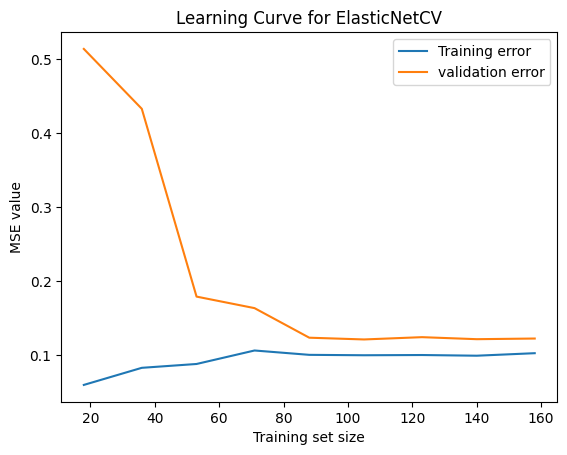

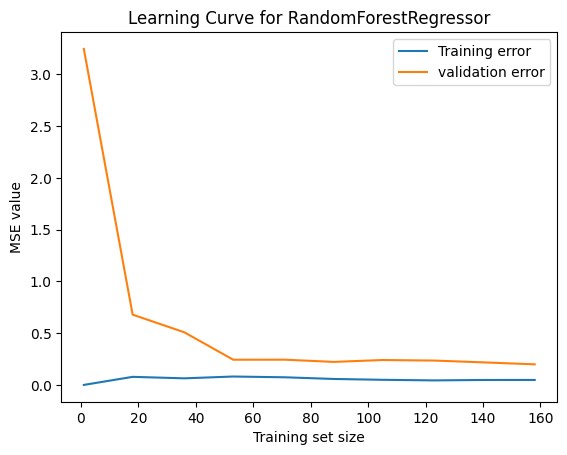

In [44]:

from sklearn.model_selection import learning_curve
for model in models:
  train_sizes , train_scores , validation_scores =learning_curve(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes =np.linspace(0.01, 1,10))
  train_score_mean=-train_scores.mean(axis=1)
  validation_score_mean=-validation_scores.mean(axis=1)
  plt.plot(train_sizes, train_score_mean, label='Training error')
  plt.plot(train_sizes, validation_score_mean, label='validation error')
  plt.xlabel('Training set size')
  plt.ylabel('MSE value')
  plt.title(f'Learning Curve for {model.__class__.__name__}')
  plt.legend()
  plt.show()



Find the importance of features for each model and use one the most important features for modeling for a better result.

Find the permutation imporatnce.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


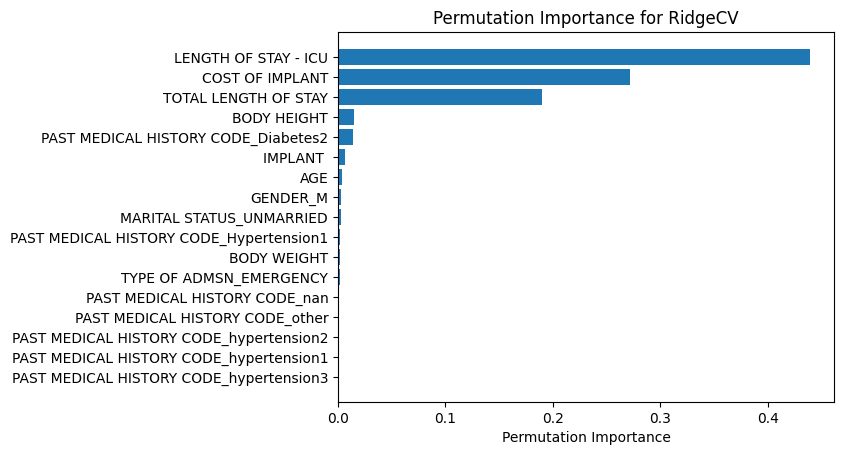

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(


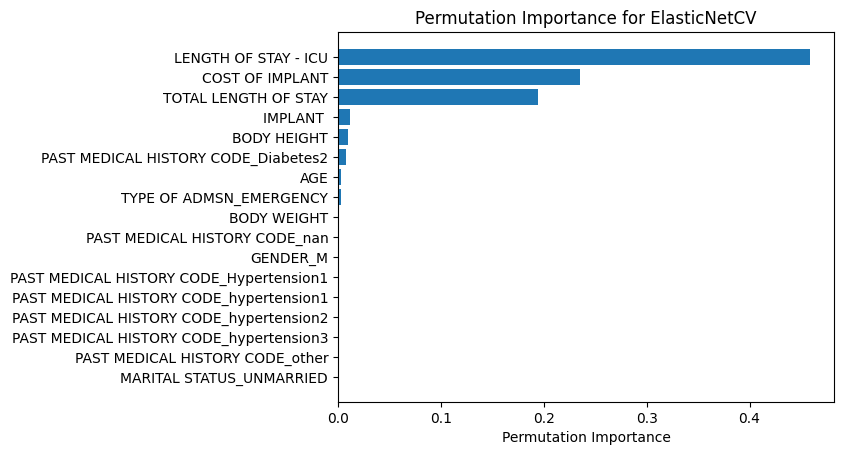

In [ ]:
from sklearn.inspection import permutation_importance
columns_name=feature.columns
x_train=pd.DataFrame(x_train, columns= columns_name)
for model in models:
        result = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
        sorted_idx = result.importances_mean.argsort()
        plt.barh(x_train.columns[sorted_idx], result.importances_mean[sorted_idx])
        plt.title(f'Permutation Importance for {model.__class__.__name__}')
        plt.xlabel('Permutation Importance')
        plt.show()


The most important factors of the cost of hospital are just 4 features for the used regression models.